In [77]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# The Pastaverse: "Imagine" the Culinary Art

| | |
|-|-|
| Author(s) | [Laxmi Harikumar](https://github.com/laxmi-genai) |

## Overview

Imagen 3 on Vertex AI brings Google's state of the art generative AI capabilities to application developers. Imagen 3 is Google's highest quality text-to-image model to date. It's capable of creating images with astonishing detail. Thus, developers have more control when building next-generation AI products that transform their imagination into high quality visual assets. Learn more about [Imagen on Vertex AI](https://cloud.google.com/vertex-ai/generative-ai/docs/image/overview).


## Objectives
In this tutorial, you will learn how to use the Google Gen AI SDK for Python to interact with the Imagen 3 and Imagen 3 Fast models to generate images, rewrite prompts and upscale images

## Getting Started

### Install Google Gen AI SDK for Python

In [78]:
!pip install --upgrade --quiet google-genai

### Restart runtime
To use the newly installed packages in this Jupyter runtime, you must restart the runtime. You can do this by running the cell below, which restarts the current kernel.

The restart might take a minute or longer. After it's restarted, continue to the next step.

In [ ]:
import IPython

app = IPython.Application.instance()
app.kernel.do_shutdown(True)

<div class="alert alert-block alert-warning">
<b>⚠️ The kernel is going to restart. Wait until it's finished before continuing to the next step. ⚠️</b>
</div>

### Authenticate your notebook environment (Colab only)
If you are running this notebook on Google Colab, run the cell below to authenticate your environment.

In [81]:
import sys

if "google.colab" in sys.modules:
    from google.colab import auth

    auth.authenticate_user()

### Import libraries

In [82]:
from google import genai
from google.genai.types import (
    GenerateContentConfig,
    SafetySetting,
    GenerateImagesConfig,
    UpscaleImageConfig
)
import os
import typing

from IPython import display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps
import matplotlib.pyplot as plt
from pprint import pprint

### Set up Google Cloud Project for Vertex AI

- In your Google Cloud project.[Enable the Vertex AI API](https://console.cloud.google.com/flows/enableapi?apiid=aiplatform.googleapis.com)
- Run the cell below to set your project ID.

In [83]:
PROJECT_ID = ""  # @param {type: "string", placeholder: "[your-project-id]", isTemplate: true}
if not PROJECT_ID or PROJECT_ID == "[your-project-id]":
    PROJECT_ID = str(os.environ.get("GOOGLE_CLOUD_PROJECT"))

LOCATION = os.environ.get("GOOGLE_CLOUD_REGION", "us-central1")

In [84]:
client = genai.Client(vertexai=True, project=PROJECT_ID, location=LOCATION)

## Load the image generation models

In [85]:
generation_model = "imagen-3.0-generate-002"
generation_model_fast = "imagen-3.0-fast-generate-001"

## Helper functions

In [86]:
def display_image(
    image,
    max_width: int = 600,
    max_height: int = 350,
) -> None:
    pil_image = typing.cast(PIL_Image.Image, image._pil_image)
    if pil_image.mode != "RGB":
        # RGB is supported by all Jupyter environments (e.g. RGBA is not yet)
        pil_image = pil_image.convert("RGB")
    image_width, image_height = pil_image.size
    if max_width < image_width or max_height < image_height:
        # Resize to display a smaller notebook image
        pil_image = PIL_ImageOps.contain(pil_image, (max_width, max_height))
    display(pil_image)

## Generate Images

#### Imagen 3 & Imagen 3 Fast

These two model options give you the choice to optimize for quality and latency, depending on your use case.

**Imagen 3:** Generates high quality images with natural lighting and increased photorealism.

**Imagen 3 Fast:** Suitable for creating brighter images with a higher contrast. Overall, you can see a 40% decrease in latency in Imagen 3 Fast compared to Imagen 2.

With Imagen 3 and Imagen 3 Fast, you can also configure the `aspect ratio` to any of the following:
* 1:1
* 9:16
* 16:9
* 3:4
* 4:3

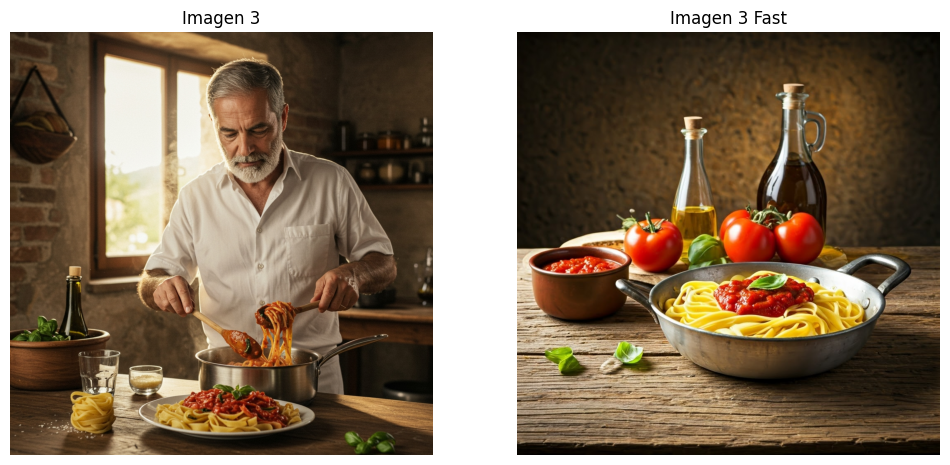

In [87]:
prompt = "Artistic depiction of Italian pasta with tomato sauce being prepared in a rustic setting"

# Imagen 3 image generation
pasta_image = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=GenerateImagesConfig(
      number_of_images=1,
      aspect_ratio="1:1",
      include_rai_reason=True,
      output_mime_type='image/jpeg',
   ),
)

# Imagen 3 Fast image generation
fast_image = client.models.generate_images(
    model=generation_model_fast,
    prompt=prompt,
    config=GenerateImagesConfig(
      number_of_images=1,
      aspect_ratio="1:1",
      include_rai_reason=True,
      output_mime_type='image/jpeg',
   ),
)

# Display generated images
fig, axis = plt.subplots(1, 2, figsize=(12, 6))
axis[0].imshow(pasta_image.generated_images[0].image._pil_image)
axis[0].set_title("Imagen 3")
axis[1].imshow(fast_image.generated_images[0].image._pil_image)
axis[1].set_title("Imagen 3 Fast")
for ax in axis:
    ax.axis("off")
plt.show()

## Prompt Rewriter

The `imagen-3.0-generate-002` model offers the option to enhance your provided prompt. To utilize this feature, set `enhance_prompt` to True. A new, detailed prompt will be created from your original one to help generate higher quality images.

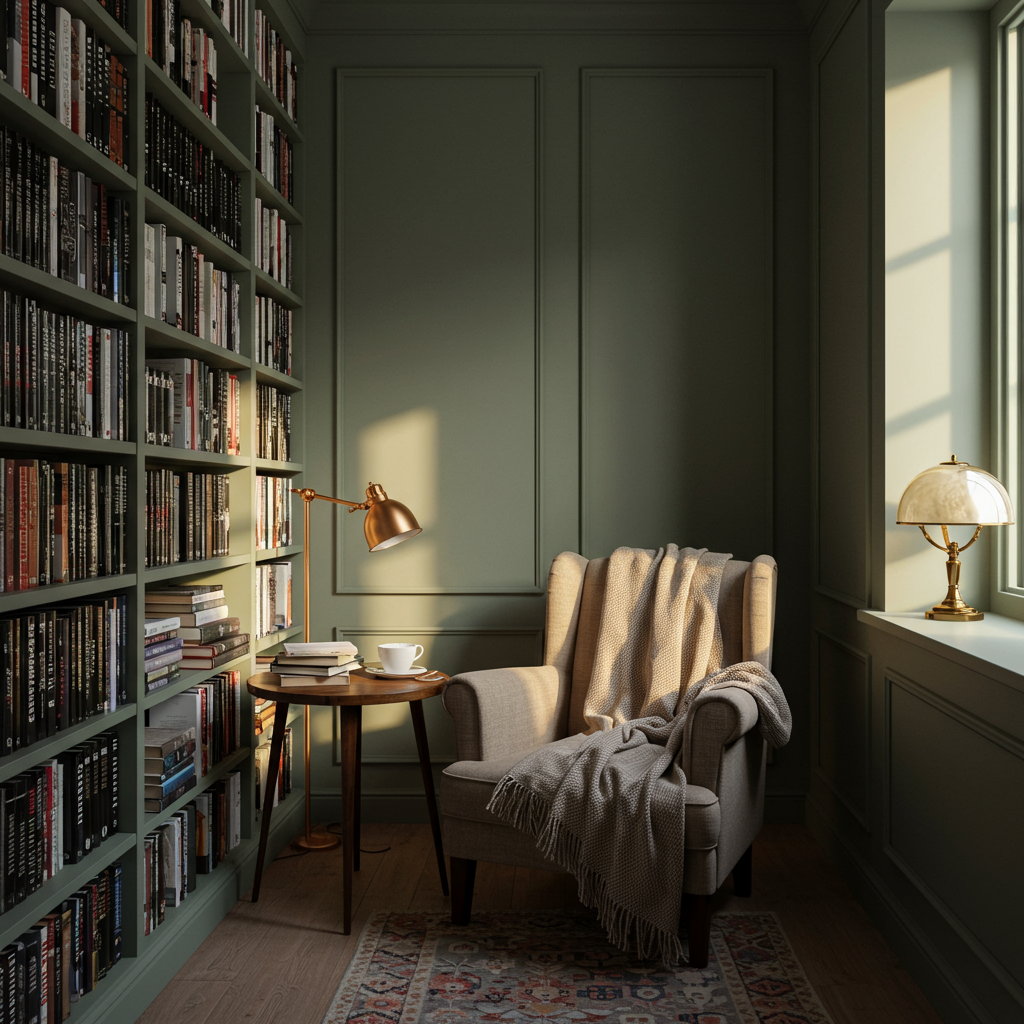

In [88]:
prompt = """
a cozy reading nook surrounded by book shelves
"""

imagenook = client.models.generate_images(
    model=generation_model,
    prompt=prompt,
    config=GenerateImagesConfig(
        number_of_images=1,
        aspect_ratio="1:1",
        enhance_prompt=True,
        safety_filter_level="BLOCK_MEDIUM_AND_ABOVE",
        person_generation="DONT_ALLOW",
    ),
)

imagenook.generated_images[0].image.show()

In [ ]:
# Print the enhanced prompt
pprint(image.generated_images[0].enhanced_prompt)

('A cozy reading nook nestled within a room, surrounded by floor-to-ceiling '
 'bookshelves filled with an eclectic mix of books. A soft, plush armchair '
 'with a warm, knitted throw is positioned in the corner, inviting '
 'relaxation.  Natural light streams through a large window, illuminating the '
 'space and creating a warm, inviting atmosphere. The walls are painted a '
 'soothing cream color, complemented by a dark wooden floor and warm, ambient '
 'lighting, enhancing the sense of tranquility. The room features a small '
 'table beside the chair with a warm tea mug, a soft lamp, and a few beloved '
 'books on display. This image is a tribute to the joy of reading, a moment of '
 'quiet contemplation, and the comforting embrace of books in a well-lit, '
 'serene environment.')


## Upscale image

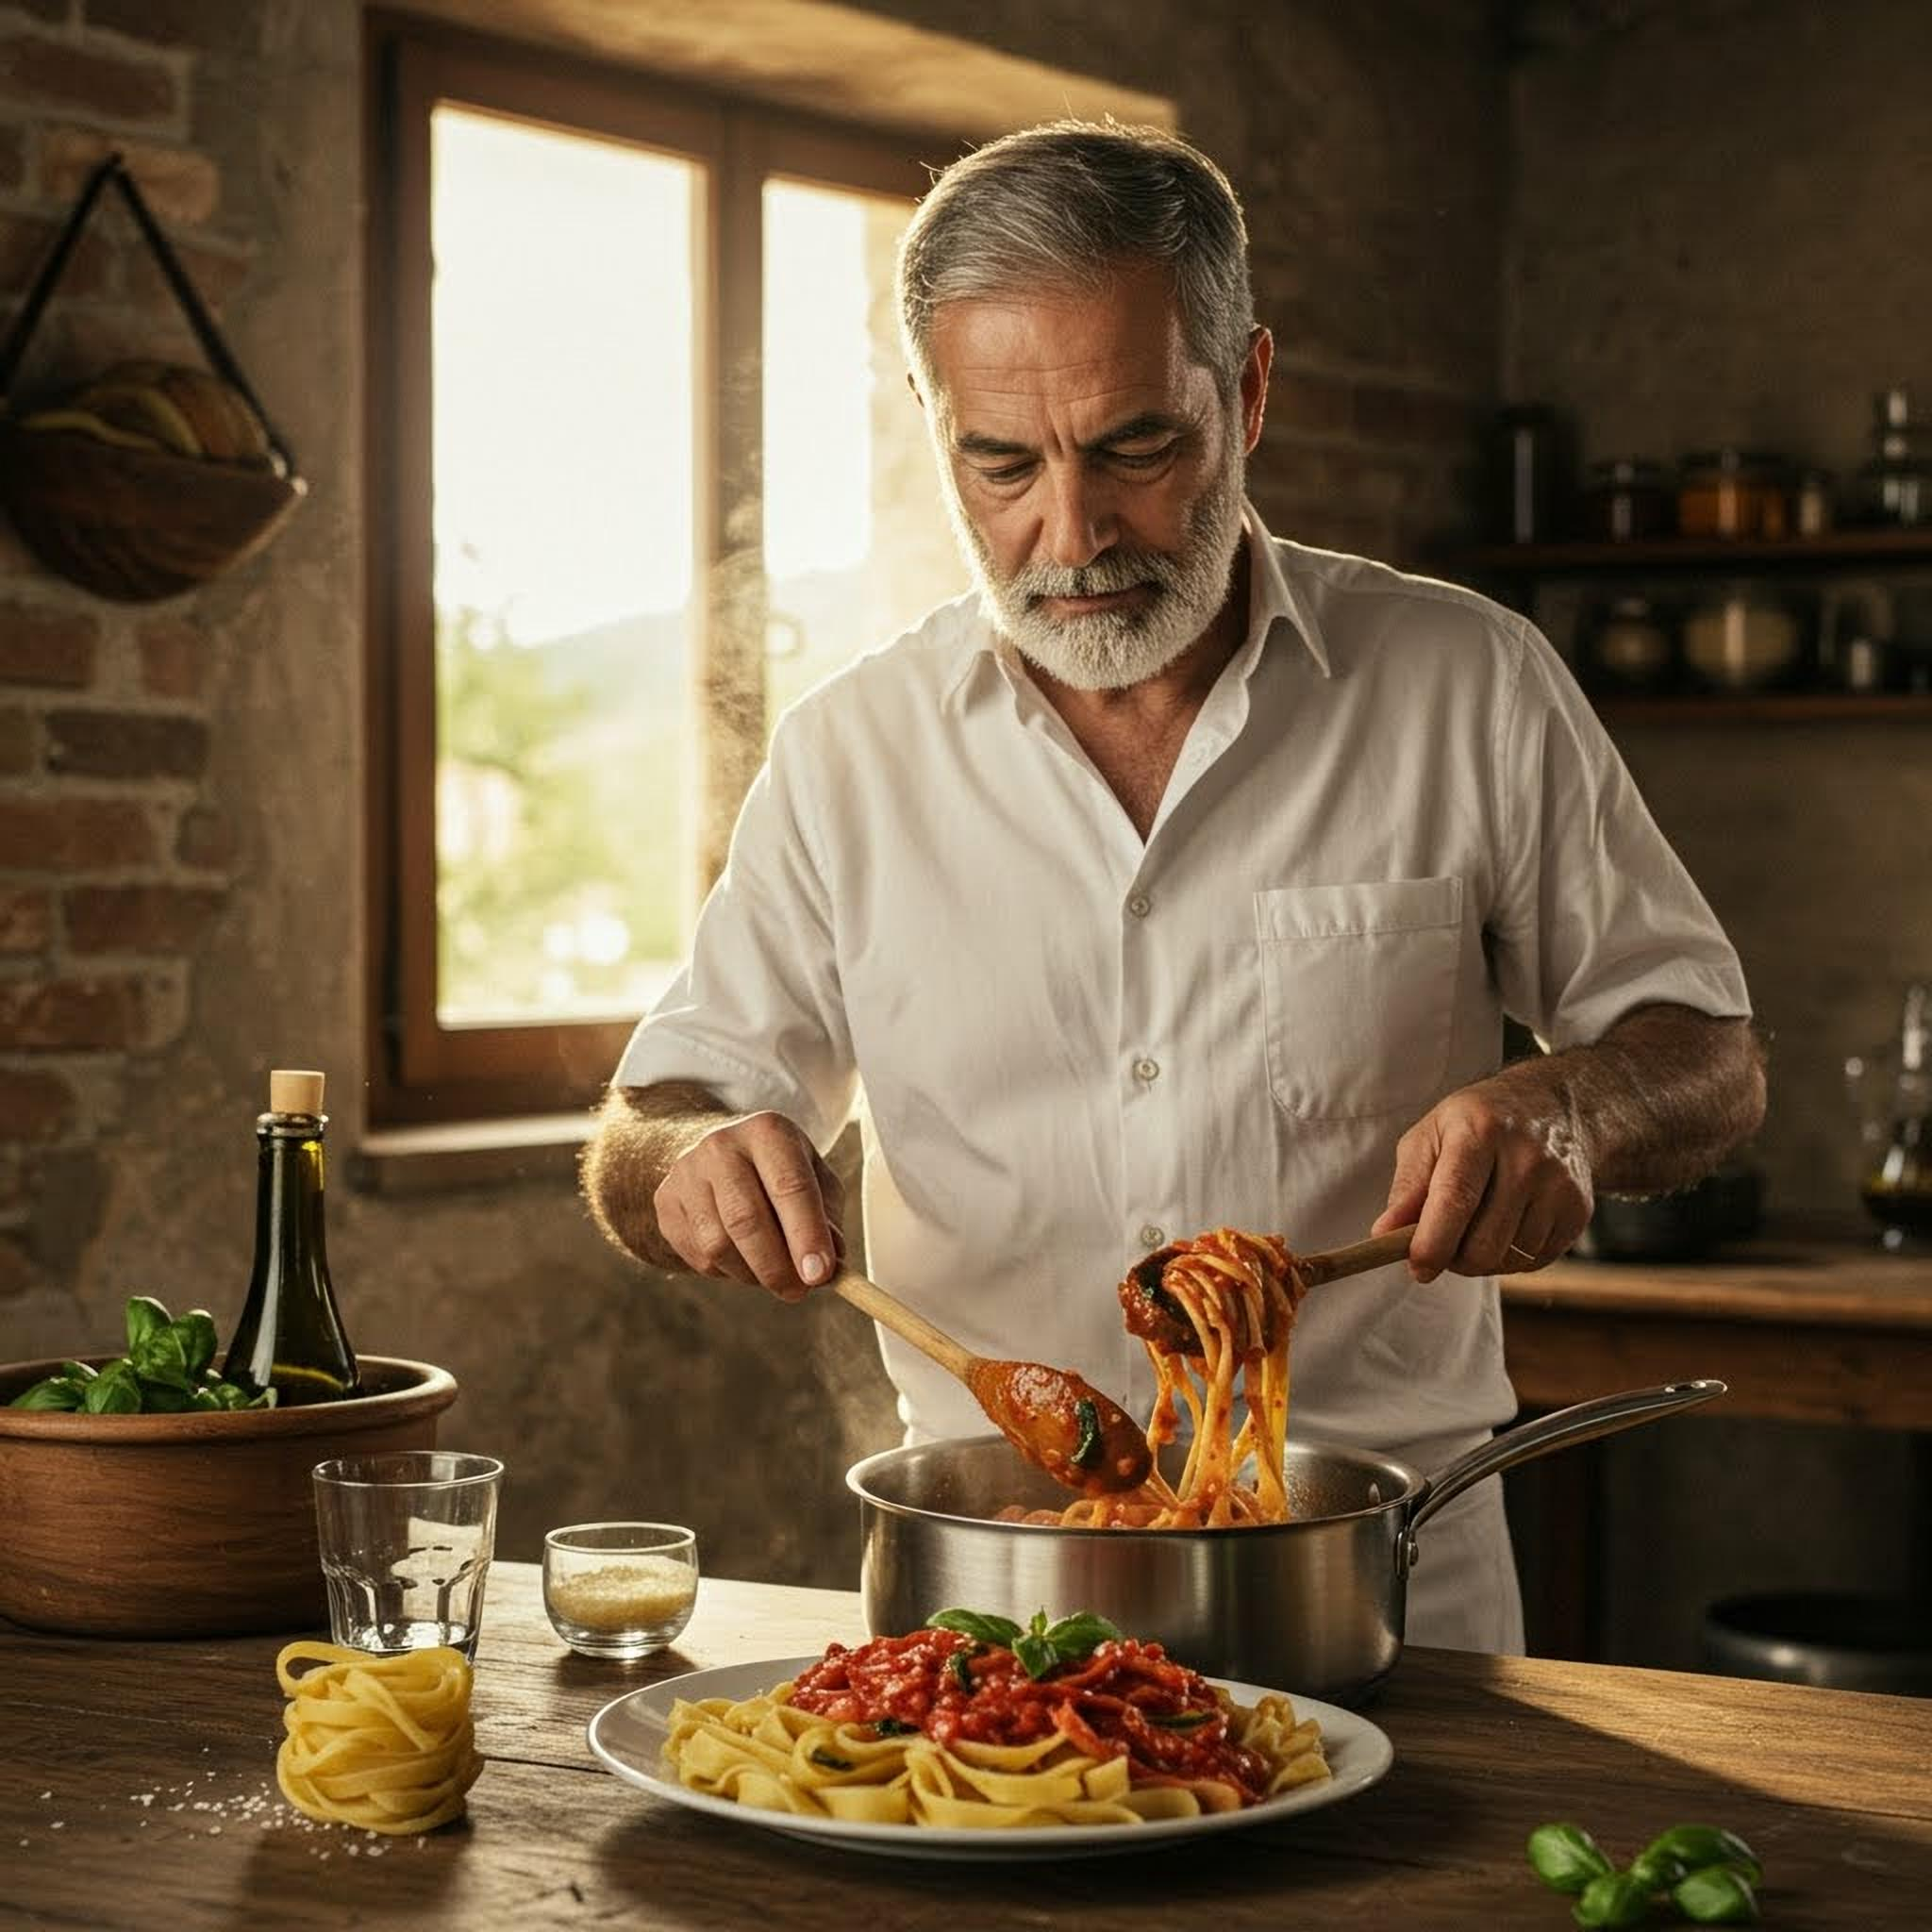

In [89]:
# Upscale the generated image from above
response2 = client.models.upscale_image(
    model='imagen-3.0-generate-001',
    image=pasta_image.generated_images[0].image,
    upscale_factor='x2',
    config=UpscaleImageConfig(
        include_rai_reason=True,
        output_mime_type='image/jpeg',
    ),
)
response2.generated_images[0].image.show()